Notebook Courtesy: Farhad Kamangar, CSE@UTA

# What is an edge?
* Edge is where change occurs
* The changes due to noise are not edges
* Edges in real images are not perfectly sharp
* Change is measured by gradients
* Biggest change is where the gradient has maximum magnitude (Or 2nd derivative is zero)
* Edge detection is the process of finding edges in an image
* A contour is a curve that passes through neighboring edge points
* Edge following is the process of searching the image to determine contours

## Finding an edge in one dimensions 
We know that an edge is where the change occurs. We also know that change is related to the derivative of a signal. if we calculate the derivative of a signal then we can claim that there is an edge at any point that the derivative has a maxima or at any point that the derivative is greater than a prespecified threshold.

Let's consider a one dimensional signal and display its derivative.

Notice that if the signal is noisy, then the derivative has too many maximas.

In [1]:
# Import the required modules
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from PIL import Image
from skimage import data
import scipy
from ipywidgets import interact, fixed, FloatSlider, IntSlider, Label, Checkbox, FloatRangeSlider

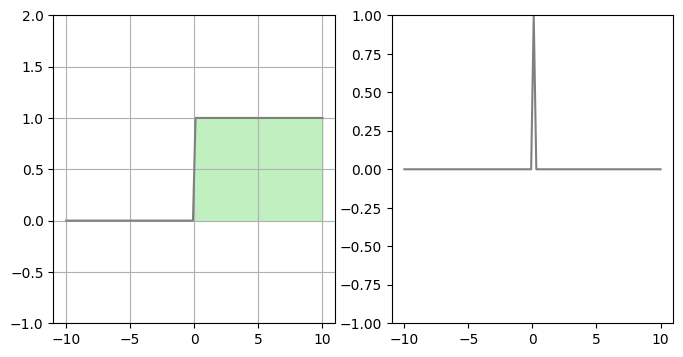

interactive(children=(FloatSlider(value=0.0, description='noise_amplitude', max=1.0, step=0.05), Output()), _d…

In [2]:
def demo_1d_signal(noise_amplitude=0.1):
    kernel=np.array([1,-1])
    x=np.linspace(-10,10,100)
    y=x.copy()*0
    y[int(x.size/2):]=1.0
    noise=2*(np.random.rand(*x.shape)-0.5)*noise_amplitude
    y=y+noise
    derivative=np.convolve(y,kernel,mode='same')
    fig = plt.figure()
    fig.set_size_inches(8,4)
    ax1 = fig.add_subplot(121)
    plt.grid(True)
    ax1.plot(x,y,color='gray')
    plt.ylim(-1,2)
    ax1.fill_between(x,y,0,color='#c0f0c0')
    ax2 = fig.add_subplot(122)
    ax2.plot(x,derivative,color='gray')
    plt.ylim(-1,1)
    plt.show()
interact(demo_1d_signal,noise_amplitude=FloatSlider(min=0., max=1., step=0.05, value=0.0));

## Reducing the effect of noise on edge detection
To reduce the effect of noise on edge detection we can convolve the original signal with a smooting kernel such as a Gaussian kernel

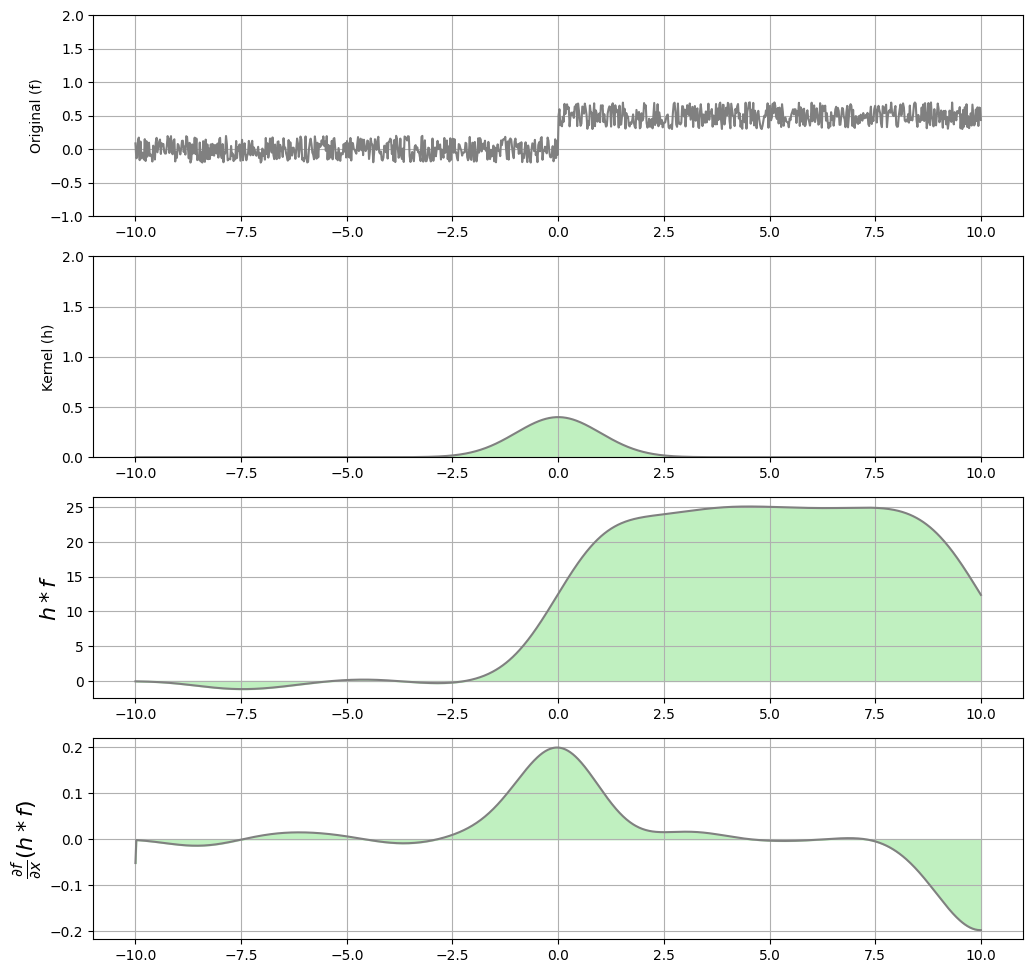

interactive(children=(FloatSlider(value=0.2, description='noise_amplitude', max=1.0, step=0.05), FloatSlider(v…

In [3]:
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True
def demo_1d_smoothing(noise_amplitude=0.1,sigma=1):
    mean=0
    edge_detection_kernel=np.array([1,-1])
    x=np.linspace(-10,10,1000)
    y=x.copy()*0
    y[int(x.size/2):]=0.5
    
    noise=2*(np.random.rand(*x.shape)-0.5)*noise_amplitude
    y=y+noise
    gaussian_kernel= (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-((x-mean)**2)/(2*sigma**2))
    smooth_signal=np.convolve(y,gaussian_kernel,mode='same')
    derivative_of_smooth_signal=np.convolve(smooth_signal,edge_detection_kernel,mode='same')
    # Plot the signals
    fig = plt.figure()
    fig.set_size_inches(12,12)
    ax1 = fig.add_subplot(4,1,1)
    ax1.plot(x,y,color='gray')
    ax1.set_ylabel('Original (f)')
    plt.grid(True)
    plt.ylim(-1,2)
    ax2 = fig.add_subplot(4,1,2)
    ax2.plot(x,gaussian_kernel,color='gray')
    ax2.set_ylabel('Kernel (h)')
    plt.grid(True)
    ax2.fill_between(x,gaussian_kernel,0,color='#c0f0c0')
    plt.ylim(0,2)
    ax3 = fig.add_subplot(4,1,3)
    ax3.plot(x,smooth_signal,color='gray')
    ax3.set_ylabel(r'$h*f$',fontsize=16)
    plt.grid(True)
    ax3.fill_between(x,smooth_signal,0,color='#c0f0c0')
    ax4 = fig.add_subplot(4,1,4)
    ax4.plot(x,derivative_of_smooth_signal,color='gray')
    ax4.set_ylabel(r'$\frac{{{\partial}f}}{{\partial {x}}}(h*f)$',fontsize=16)
    plt.grid(True)
    ax4.fill_between(x,derivative_of_smooth_signal,0,color='#c0f0c0')
    plt.show()
interact(demo_1d_smoothing,noise_amplitude=FloatSlider(min=0., max=1., step=0.05, value=0.2),
          sigma=FloatSlider(min=0.1, max=10., step=0.05, value=1));

Notice that the final signal in the above demo is the derivative of the convolution between the original signal and the Gaussian kernel
$$\frac{{{\partial}f}}{{\partial {x}}}(h*f)$$ 

where $h$ is the kernel,  $f$ is the original signal, and $*$ is the convolution

This equation can be written as: 
$$\frac{{{\partial}f}}{{\partial {x}}}(h*f)=(\frac{{{\partial}f}}{{\partial {x}}}h)*f$$

This means that instead of convolving the original signal with the Gaussian kernel and then getting the derivative of the resulting signal, we can convolve the origianl signal with the derivative of the Gaussian.

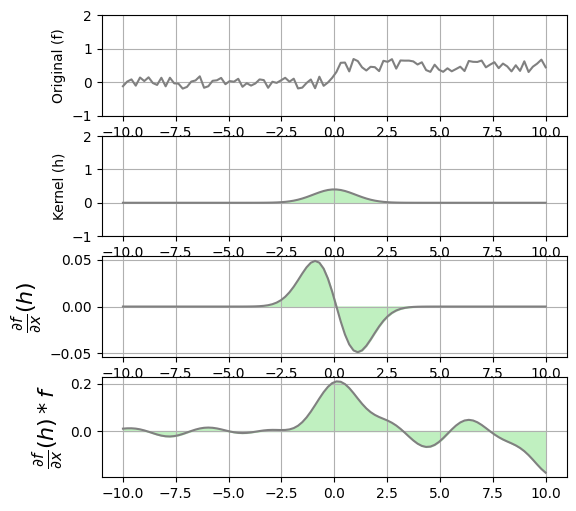

interactive(children=(FloatSlider(value=0.2, description='noise_amplitude', max=1.0, step=0.05), FloatSlider(v…

In [4]:
def demo_1d_smoothing_2(noise_amplitude=0.1,sigma=1):
    mean=0
    edge_detection_kernel=np.array([1,-1])
    x=np.linspace(-10,10,100)
    y=x.copy()*0
    y[int(x.size/2):]=0.5
    # Create noise
    noise=2*(np.random.rand(*x.shape)-0.5)*noise_amplitude
    y=y+noise
    gaussian_kernel= (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-((x-mean)**2)/(2*sigma**2))
    derivative_of_gaussian=np.convolve(gaussian_kernel,edge_detection_kernel,mode='same')
    smooth_signal=np.convolve(y,gaussian_kernel,mode='same')
    derivative_of_smooth_signal=np.convolve(y,derivative_of_gaussian,mode='same')
    # Plot the signals
    fig = plt.figure()
    fig.set_size_inches(6,6)
    ax1 = fig.add_subplot(4,1,1)
    ax1.plot(x,y,color='gray')
    ax1.set_ylabel('Original (f)')
    plt.ylim(-1,2)
    plt.grid(True)
    ax2 = fig.add_subplot(4,1,2)
    ax2.plot(x,gaussian_kernel,color='gray')
    ax2.set_ylabel('Kernel (h)')
    plt.grid(True)
    plt.ylim(-1,2)
    ax2.fill_between(x,gaussian_kernel,0,color='#c0f0c0')
    ax3 = fig.add_subplot(4,1,3)
    ax3.plot(x,derivative_of_gaussian,color='gray')
    ax3.set_ylabel(r'$\frac{{{\partial}f}}{{\partial {x}}}(h)$',fontsize=16)
    plt.grid(True)  
    ax3.fill_between(x,derivative_of_gaussian,0,color='#c0f0c0')
    ax4 = fig.add_subplot(4,1,4)
    ax4.plot(x,derivative_of_smooth_signal,color='gray')
    plt.grid(True)
    ax4.fill_between(x,derivative_of_smooth_signal,0,color='#c0f0c0')
    ax4.set_ylabel(r'$\frac{{{\partial}f}}{{\partial {x}}}(h)*f$',fontsize=16)
    plt.show()
_=interact(demo_1d_smoothing_2,noise_amplitude=FloatSlider(min=0., max=1., step=0.05, value=0.2),
          sigma=FloatSlider(min=0.1, max=10., step=0.05, value=1))

## What is the gradient of an image?
Gradient of an image is a vector $\large \nabla f = \left[ {\begin{array}{*{20}{c}}
{\frac{{\partial f}}{{\partial x}}}\\
{\frac{{\partial f}}{{\partial y}}}
\end{array}} \right]$

Magnitude of gradient at position $ x, y$ tells us how fast the intensity of the image changes in that position $\large \left\| {\nabla f} \right\| = \sqrt {f_x^2 + f_y^2} $

$\large \frac{{\nabla f}}{{\left\| {\nabla f} \right\|}}$ is a unit vector in the direction of fastest change.



## How to calculate gradient on a digital image?
We can approximate the gradient on a digital image $f(x,y)$ by subtracting a pixel from it's neighbor. The question is which neighbor. For example the gradient in the x direction at pixel position $(i,j)$ can be calculated either as
$$\large Gx \approx {\Delta _x}f\left( {i,j} \right) = f\left( {i + 1,j} \right) - f\left( {i,j} \right)$$ which is called forward difference. Or it may be calculated as:
$$\large Gx \approx {\Delta _x}f\left( {i,j} \right) = f\left( {i,j} \right) - f\left( {i - 1,j} \right)$$ which is called backward difference. 

Notice that we can represent the calculation of the gradient as a linear filter (kernel) operation:

$\large Gx = \left[ {\begin{array}{*{20}{c}}
{ 1}&-1
\end{array}} \right]$ 

The example code below demonstrates the effect of applying the simple gradient kernels in x and y directions

$\large Gx = \left[ {\begin{array}{*{20}{c}}
{  1}&-1
\end{array}} \right]$        and              $\large Gy = \left[ {\begin{array}{*{20}{c}}
1\\
{ - 1}
\end{array}} \right]$


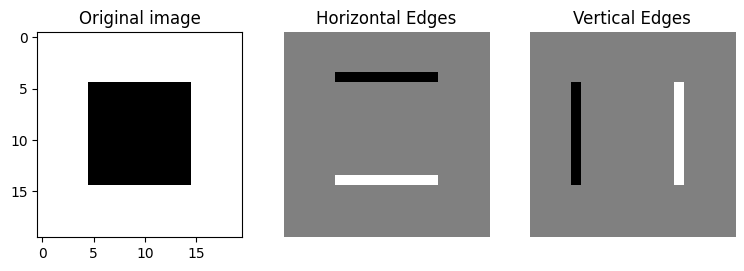

interactive(children=(IntSlider(value=20, description='Image size', max=200, min=10, step=10), Checkbox(value=…

In [5]:
from scipy.ndimage import convolve
plt.rcParams['image.interpolation'] = 'none'
def demo_gradient_01(image_size=20,display_absolute=False):
    original_image=np.ones((image_size,image_size))
    original_image[int(image_size/4):-int(image_size/4),int(image_size/4):-int(image_size/4)]=0
    # original_image = data.camera()/255. 
    #print(original_image)
    
    horizontal_kernel = np.array([[1],[-1]])
    vertical_kernel = np.array([[1.,-1.0]])

    # horizontal_kernel = np.array([[ 1.,  2,  1],[ 0,  0,  0],[-1,-2,-1]])
    # vertical_kernel = np.array([[ -1.,  0,  1],[ -2,  0,  2],[-1,0,1]])

    # Normalize the kernels
    kernel_sum=abs(np.sum(horizontal_kernel))
    horizontal_kernel= horizontal_kernel/kernel_sum if kernel_sum else horizontal_kernel
    kernel_sum=abs(np.sum(vertical_kernel))
    vertical_kernel= vertical_kernel/kernel_sum if kernel_sum else vertical_kernel
    horizontal_edge_image = scipy.ndimage.convolve(original_image, horizontal_kernel)
    #print(np.abs(horizontal_edge_image[0:18, 0:18]))
    vertical_edge_image = scipy.ndimage.convolve(original_image, vertical_kernel)
    fig1, axes_array = plt.subplots(1, 3)
    fig1.set_size_inches(9,3)
    #print(vertical_edge_image[0:15, 0:15])
    image_plot = axes_array[0].imshow(original_image ,cmap=plt.cm.gray) # Show the original image
    # axes_array[0].axis('off')
    axes_array[0].set(title='Original image')
    
    if display_absolute:
        image_plot = axes_array[1].imshow(np.abs(horizontal_edge_image),cmap=plt.cm.gray) # Show absolute value of the filtered image
    else:
        image_plot = axes_array[1].imshow(horizontal_edge_image,cmap=plt.cm.gray) # Show the filtered image
    axes_array[1].axis('off')
    axes_array[1].set(title='Horizontal Edges')
    if display_absolute:
        image_plot = axes_array[2].imshow(np.abs(vertical_edge_image),cmap=plt.cm.gray) 
    else:
        image_plot = axes_array[2].imshow(vertical_edge_image,cmap=plt.cm.gray) 
    axes_array[2].axis('off')
    axes_array[2].set(title='Vertical Edges')
    plt.show()
interact(demo_gradient_01,image_size=IntSlider(min=10, max=200., step=10, value=20,description='Image size'),
        display_absolute=Checkbox(value=False,description='Display Absolute Vaues',disabled=False));

## Averaging forward and backward gradients of an image
We may also calculate the average of forward and backward difference gradients:

$$\large \frac{{f\left( {i + 1,j} \right) - f\left( {i,j} \right) + f\left( {i,j} \right) - f\left( {i - 1,j} \right)}}{2} = 0.5f\left( {i + 1,j} \right) - 0.5f\left( {i - 1,j} \right)$$

Again, we can represent the calculation of the average gradient as a linear filter (kernel) operation:

 $\large Gx = \left[ {\begin{array}{*{20}{c}}
{ -0.5}&0 & 0.5
\end{array}} \right]$ 

The code below demonstrates the application of the above kernel in x and y directions.

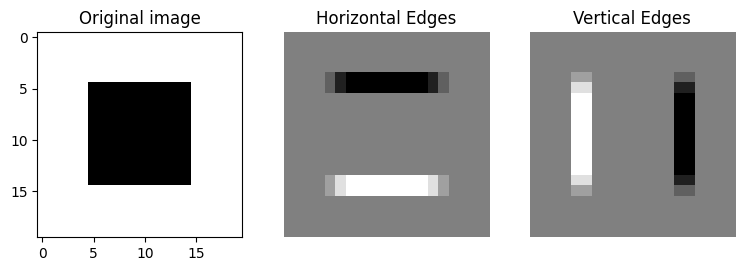

interactive(children=(IntSlider(value=20, description='Image size', max=200, min=10, step=10), Checkbox(value=…

In [6]:
from scipy.ndimage import convolve
plt.rcParams['image.interpolation'] = 'none'
def demo_gradient_02(image_size=20,display_absolute=False):
    original_image=np.ones((image_size,image_size))
    original_image[int(image_size/4):-int(image_size/4),int(image_size/4):-int(image_size/4)]=0

    horizontal_kernel = np.array([[ 1.,  2,  1],[ 0,  0,  0],[-1,-2,-1]])
    vertical_kernel = np.array([[ -1.,  0,  1],[ -2,  0,  2],[-1,0,1]])

    # Normalize the kernels
    kernel_sum=abs(np.sum(horizontal_kernel))
    horizontal_kernel= horizontal_kernel/kernel_sum if kernel_sum else horizontal_kernel
    kernel_sum=abs(np.sum(vertical_kernel))
    vertical_kernel= vertical_kernel/kernel_sum if kernel_sum else vertical_kernel
    horizontal_edge_image = scipy.ndimage.convolve(original_image, horizontal_kernel)
    vertical_edge_image = scipy.ndimage.convolve(original_image, vertical_kernel)
    fig1, axes_array = plt.subplots(1, 3)
    fig1.set_size_inches(9,3)
    
    image_plot = axes_array[0].imshow(original_image ,cmap=plt.cm.gray) # Show the original image
    # axes_array[0].axis('off')
    axes_array[0].set(title='Original image')
    if display_absolute:
        image_plot = axes_array[1].imshow(np.abs(horizontal_edge_image),cmap=plt.cm.gray) # Show absolute value of the filtered image
    else:
        image_plot = axes_array[1].imshow(horizontal_edge_image,cmap=plt.cm.gray) # Show the filtered image
    axes_array[1].axis('off')
    axes_array[1].set(title='Horizontal Edges')
    if display_absolute:
        image_plot = axes_array[2].imshow(np.abs(vertical_edge_image),cmap=plt.cm.gray) 
    else:
        image_plot = axes_array[2].imshow(vertical_edge_image,cmap=plt.cm.gray) 
    axes_array[2].axis('off')
    axes_array[2].set(title='Vertical Edges')
    plt.show()
interact(demo_gradient_02,image_size=IntSlider(min=10, max=200., step=10, value=20,description='Image size'),
        display_absolute=Checkbox(value=False,description='Display Absolute Vaues',disabled=False));

## Steps in edge detections
Generally the edge detection process requires three steps:
* **Filtering (noise removal):** Since the calculation of  image gradient is sensitive to noise, a smoothing filter is usually used before calculating the gradient
* **Gradient calculation:** Either first or second order gradients are calculated after the noise removal
* **Detecting edges:** Once the gradient is calculated, a thresholding, or selection, process is performed to detrmine which points (pixels) are edge points.

### Note:
Selecting a pixel as an edge pixel does not determine the orientation of the edge or if the continuity of the edge. Additional steps may be required to find the contour which may be passing through a particular pixel. 


## Roberts Operator
Roberts operator are designed to to respond maximally to gradients running at 45 degrees. The kernels for the roberts operator are:


$\large G = \left[ {\begin{array}{*{20}{c}}
1&0\\
0&{ - 1}
\end{array}} \right]$    and   $\large G = \left[ {\begin{array}{*{20}{c}}
0&{ - 1}\\
1&0
\end{array}} \right]$


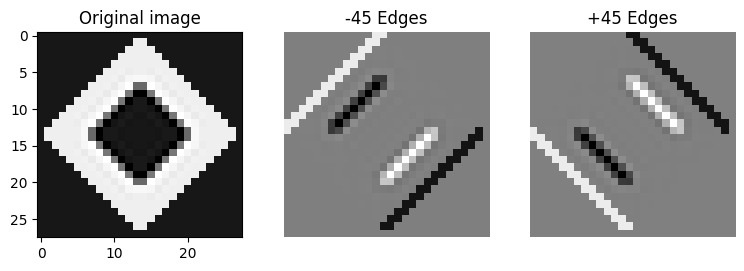

interactive(children=(IntSlider(value=20, description='Image size', max=400, min=10, step=10), FloatSlider(val…

In [7]:
from scipy.ndimage import convolve
plt.rcParams['image.interpolation'] = 'none'
def demo_roberts_operator(image_size=20,rotation_angle=45,display_absolute=False):
    original_image=np.ones((image_size,image_size))
    original_image[int(image_size/4):-int(image_size/4),int(image_size/4):-int(image_size/4)]=0
    original_image=scipy.ndimage.rotate(original_image,rotation_angle)
    horizontal_kernel = np.array([[ 1.,0],[ 0,-1.]])
    vertical_kernel = np.array([[ 0,-1.],[ 1,0]])

    # Normalize the kernels
    kernel_sum=abs(np.sum(horizontal_kernel))
    horizontal_kernel= horizontal_kernel/kernel_sum if kernel_sum else horizontal_kernel
    kernel_sum=abs(np.sum(vertical_kernel))
    vertical_kernel= vertical_kernel/kernel_sum if kernel_sum else vertical_kernel

    horizontal_edge_image = scipy.ndimage.convolve(original_image, horizontal_kernel)
    vertical_edge_image = scipy.ndimage.convolve(original_image, vertical_kernel)
    fig1, axes_array = plt.subplots(1, 3)
    fig1.set_size_inches(9,3)
    image_plot = axes_array[0].imshow(original_image ,cmap=plt.cm.gray) # Show the original image
    # axes_array[0].axis('off')
    axes_array[0].set(title='Original image')
    if display_absolute:
        image_plot = axes_array[1].imshow(np.abs(horizontal_edge_image),cmap=plt.cm.gray) # Show the filtered image
    else:
        image_plot = axes_array[1].imshow(horizontal_edge_image,cmap=plt.cm.gray) # Show the filtered image
    axes_array[1].axis('off')
    axes_array[1].set(title='-45 Edges')
    if display_absolute:
        image_plot = axes_array[2].imshow(np.abs(vertical_edge_image),cmap=plt.cm.gray) # Show the sharpened image
    else:
        image_plot = axes_array[2].imshow(vertical_edge_image,cmap=plt.cm.gray) # Show the sharpened image
    axes_array[2].axis('off')
    axes_array[2].set(title='+45 Edges')
    plt.show()

interact(demo_roberts_operator,image_size=IntSlider(min=10, max=400., step=10, value=20,description='Image size'),
         rotation_angle=FloatSlider(min=0.0, max=90., step=5, value=45,description='Angle'),
        display_absolute=Checkbox(value=False,description='Display Absolute Vaues',disabled=False));

## Sobel Operator
Sobel operators are designed to respond maximally to horizontal and vertical gradients. The kernels for the Sobel operator are:


$\large {G_x} = \left[ {\begin{array}{*{20}{c}}
{ - 1}&0&1\\
{ - 2}&0&2\\
{ - 1}&0&1
\end{array}} \right]$            and             $\large {G_y} = \left[ {\begin{array}{*{20}{c}}
1&2&1\\
0&0&0\\
{ - 1}&{ - 2}&{ - 1}
\end{array}} \right]$

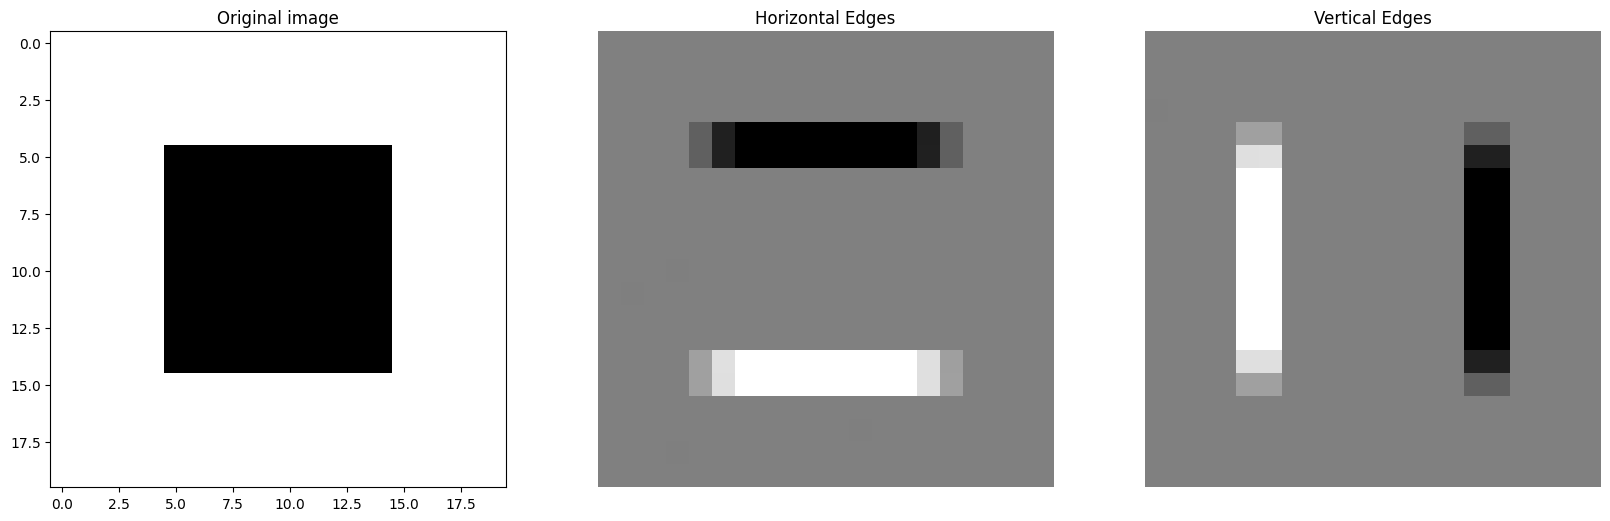

interactive(children=(IntSlider(value=20, description='Image size', max=400, min=10, step=10), FloatSlider(val…

In [8]:
from scipy.ndimage import convolve
plt.rcParams['image.interpolation'] = 'none'
def demo_roberts_operator(image_size=20,rotation_angle=0,display_absolute=False):
    original_image=np.ones((image_size,image_size))
    original_image[int(image_size/4):-int(image_size/4),int(image_size/4):-int(image_size/4)]=0
    original_image=scipy.ndimage.rotate(original_image,rotation_angle)
    horizontal_kernel = np.array([[ 1.,  2,  1],[ 0,  0,  0],[-1,-2,-1]])
    vertical_kernel = np.array([[ -1.,  0,  1],[ -2,  0,  2],[-1,0,1]])

    # Normalize the kernels
    kernel_sum=abs(np.sum(horizontal_kernel))
    horizontal_kernel= horizontal_kernel/kernel_sum if kernel_sum else horizontal_kernel
    kernel_sum=abs(np.sum(vertical_kernel))
    vertical_kernel= vertical_kernel/kernel_sum if kernel_sum else vertical_kernel

    horizontal_edge_image = scipy.ndimage.convolve(original_image, horizontal_kernel)
    vertical_edge_image = scipy.ndimage.convolve(original_image, vertical_kernel)
    fig1, axes_array = plt.subplots(1, 3)
    fig1.set_size_inches(20,8)
    image_plot = axes_array[0].imshow(original_image ,cmap=plt.cm.gray) # Show the original image
    # axes_array[0].axis('off')
    axes_array[0].set(title='Original image')
    if display_absolute:
        image_plot = axes_array[1].imshow(np.abs(horizontal_edge_image),cmap=plt.cm.gray) # Show the filtered image
    else:
        image_plot = axes_array[1].imshow(horizontal_edge_image,cmap=plt.cm.gray) # Show the filtered image
    axes_array[1].axis('off')
    axes_array[1].set(title='Horizontal Edges')
    if display_absolute:
        image_plot = axes_array[2].imshow(np.abs(vertical_edge_image),cmap=plt.cm.gray) # Show the sharpened image
    else:
        image_plot = axes_array[2].imshow(vertical_edge_image,cmap=plt.cm.gray) # Show the sharpened image
    axes_array[2].axis('off')
    axes_array[2].set(title='Vertical Edges')
    plt.show()
interact(demo_roberts_operator,image_size=IntSlider(min=10, max=400., step=10, value=20,description='Image size'),
         rotation_angle=FloatSlider(min=0.0, max=90., step=5, value=0,description='Angle'),
        display_absolute=Checkbox(value=False,description='Display Absolute Vaues',disabled=False));

## Using the second derivative
* Edge points are located at the peaks of the first derivative
* An alternative approach is to use the zero crossing of the second derivative. 
* The **Laplacian** may be used as a second derivative.
* The **Laplacian** is symmetric in all directions and is invariant to rotation in the image.

The two dimensional equivalent of the second derivative can be written as:
$$\large{\nabla ^2}f\left( {x,y} \right) = \frac{{{\partial ^2}f}}{{\partial {x^2}}} + \frac{{{\partial ^2}f}}{{\partial {y^2}}}$$
For digital images the Laplacian at pixel (i,j) is:


$$\large \begin{array}{c}
{\nabla ^2}f\left( {i,j} \right) \approx f\left( {i + 1,j} \right) + f\left( {i - 1,j} \right) + f\left( {i,j + 1} \right) + 
f\left( {i,j - 1} \right) - 4f\left( {i,j} \right)
\end{array}$$


Which may be written as a kernel (mask):


$$\large \left[ {\begin{array}{*{20}{c}}
0&1&0\\
1&{ - 4}&1\\
0&1&0
\end{array}} \right]$$

The code below demonstrates the operation of the Laplacian kernel

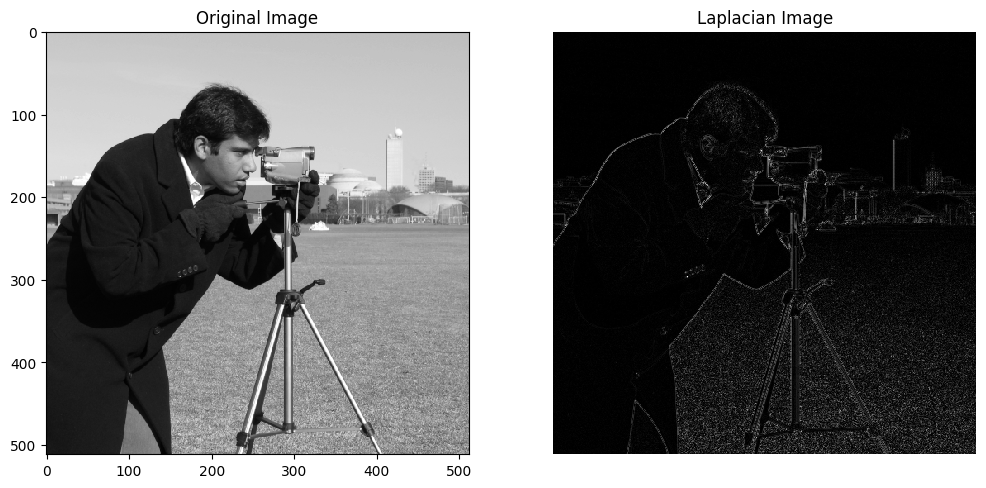

In [9]:
original_image = data.camera()/255.
laplacian_kernel=np.array([[0,1.,0],[1,-4,1],[0,1,0]])
processed_image = scipy.ndimage.convolve(original_image, laplacian_kernel)

fig1, axes_array = plt.subplots(1, 2)
fig1.set_size_inches(12,6)
image_plot = axes_array[0].imshow(original_image,cmap=plt.cm.gray) 
#axes_array[0].axis('off')
axes_array[0].set(title='Original Image')
image_plot = axes_array[1].imshow(np.abs(processed_image),cmap=plt.cm.gray)
axes_array[1].axis('off')
axes_array[1].set(title='Laplacian Image')
plt.show()

If the image is noisy then the result of Laplacian filtering will be noisy as well

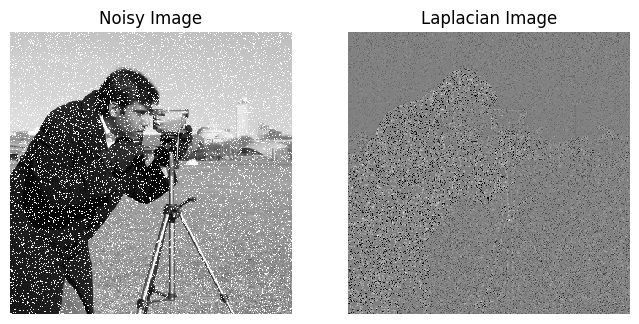

In [10]:
original_image = data.camera()/255.
noise=np.random.rand(*original_image.shape)
noisy_image=original_image.copy()
noisy_image[noise>(1-10*.01)]=1.0
laplacian_kernel=np.array([[0,1.,0],[1,-4,1],[0,1,0]])
processed_image = scipy.ndimage.convolve(noisy_image, laplacian_kernel)
fig1, axes_array = plt.subplots(1, 2)
fig1.set_size_inches(8,4)
image_plot = axes_array[0].imshow(noisy_image,cmap=plt.cm.gray) 
axes_array[0].axis('off')
axes_array[0].set(title='Noisy Image')
image_plot = axes_array[1].imshow(processed_image,cmap=plt.cm.gray)
axes_array[1].axis('off')
axes_array[1].set(title='Laplacian Image')
plt.show()

Since the second derivative creates extraneous zero crossings in the presence of noise, then the image should be smoothed before edge detection. This means that we should smooth the image using a Gaussian kernel and then calculate the second derivative of the resulting image, i.e.  $\large {\nabla ^2}(G * f) $

However $\large{\nabla ^2}(G * f) = ({\nabla ^2}G) * f$

This means that we can convolve the image with the Laplacian of the Gaussian **(LoG)** to get the same effect. The Laplacian of Gaussian can be calculated as:

$$\large {\nabla ^2}G\left( x \right) =  - \frac{1}{{\pi {\sigma ^4}}}\left( {1 - \frac{{{x^2}}}{{2{\sigma ^2}}}} \right){e^{( - \frac{{{x^2}}}{{2{\sigma ^2}}})}}$$

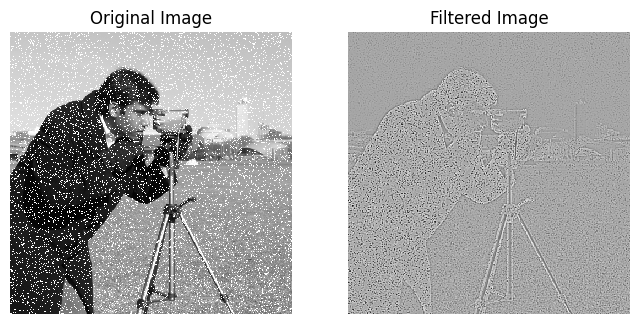

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='sigma', max=10.0), Output()…

In [11]:
def laplacian_gaussian_filter_and_display_results(original_image, sigma):
    filtered_image=scipy.ndimage.gaussian_laplace(original_image, 
            sigma=sigma,  output=None, mode='reflect', cval=0.0, truncate=4.0*sigma)
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(8,4)
    image_plot = axes_array[0].imshow(original_image,cmap=plt.cm.gray) 
    axes_array[0].axis('off')
    axes_array[0].set(title='Original Image')
    image_plot = axes_array[1].imshow(filtered_image,cmap=plt.cm.gray)
    axes_array[1].axis('off')
    axes_array[1].set(title='Filtered Image')
    plt.show()

current_image = data.camera()/255.
temp=interact(laplacian_gaussian_filter_and_display_results,original_image=fixed(noisy_image),
         sigma=FloatSlider(min=0.0, max=10, step=0.1,value=1,continuous_update=False))

## Canny edge detector

The Canny edge detector is an edge detection algorithm with multiple steps. The steps in the Canny edge detector are listed below: 
* Smooth the image to remove the noise (Gaussian filter)
* Find the gradients of the image
* Apply non-maximum suppression
* Apply double threshold. Select edge pixels by hysteresis (suppress all edges that are weak and not connected to strong edges).
